<a href="https://colab.research.google.com/github/AndrusovN/python-lab/blob/main/Andrusov's_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json
import plotly.express as px

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [2]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [3]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [4]:
jobs = ['Геймдизайнер', 'Видеомонтажёр', 'Историк', 'Журналист', 'Учитель физкультуры']

In [5]:
URL = 'https://api.hh.ru/vacancies'

def get_page(job_name: str, page_id: int):
  params = {
      'text': job_name,
      'area': 1,
      'page': page_id,
      'per_page': 10
  }
  return requests.get(URL, params).json()


def get_job_options(job_name: str):
  pages_count = get_page(job_name, 0)['pages']
  result = []
  for i in tqdm(range(pages_count)):
    result += get_page(job_name, i)['items']
    sleep(1)
  return result


In [6]:
job_options = {key: get_job_options(key) for key in jobs}

100%|██████████| 3/3 [00:05<00:00,  1.83s/it]


In [7]:
for key in job_options:
  backslash = '\n'
  print(f"{key}: {backslash}{backslash.join(map(lambda x: x['name'], job_options[key][:min(10, len(job_options[key]))]))}")

Геймдизайнер: 
3D художник
Нарративный геймдизайнер
Unity программист
Game designer
Junior Game Designer
Unity Developer (Mobile Games)
Разработчик Unity
Junior Unity 3D Developer (разработчик игр на Unity)
Middle-/Middle Game Designer
Level designer
Видеомонтажёр: 
Видеомонтажер
Монтажер игрового Youtube канала
Видеомонтажер (шорт-видео) / Film editor (short-video)
Ассистент выпускающего режиссера
Монтажëр
Видеограф
Монтажер
YouTube менеджер (удаленно)
Видеомейкер для соцсетей (удаленно)
Монтажер/Видеомонтажер (удаленная работа)
Историк: 
Музейный смотритель
Архивариус
Историк / архивист
Бильдредактор
Историк
Историк-генеалог
Историк-ассистент
Дизайнер-верстальщик
Продавец алкоголя - кавист
Ведущий архивист
Журналист: 
Редактор
Консультант онлайн-чата (интернет-провайдер)
Пресс-секретарь
Копирайтер
Редактор-корректор
Редактор-копирайтер
Менеджер по коммуникациям
Редактор отдела (удаленно)
Младший PR-менеджер
Журналист-киновед (волонтёр, стажёр, практика)
Учитель физкультуры: 
Учитель 

(1 балл) Посчитайте сколько всего найдено вакансий:

In [8]:
total = sum(len(job_options[key]) for key in jobs)
total

571

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [9]:
from typing import Tuple
class Company:
    def __init__(self, name: str, coordinates: Tuple[float, float]) -> None:
      self.name = name
      self.coordinates = coordinates
    def __hash__(self):
      return hash(self.name)

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [10]:
def get_address(job_option):
  if job_option['address'] is None:
    return None
  if job_option['address']['lat'] is not None:
    return job_option['address']['lat'], job_option['address']['lng']
  if job_option['address']['metro'] is not None and job_option['address']['metro']['lat'] is not None:
    return job_option['address']['metro']['lat'], job_option['address']['metro']['lng']
  return None

In [11]:
companies = set()
for job in jobs:
  for option in job_options[job]:
    companies.add(Company(option['employer']['name'], get_address(option)))
len(companies)

571

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [12]:
sum(len(list(filter(lambda x: get_address(x) is not None, job_options[key]))) for key in jobs)

338

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [13]:
moscow_center = (55.7522, 37.6156)
distance_to_MRR_km = 22

In [14]:
def get_distance(first, second):
  diffX = first[0] - second[0]
  diffY = first[1] - second[1]
  dist = 44000 * (diffX**2 / 4 + diffY**2)**0.5 / 180
  return dist

In [15]:
def check_inside_MRR(option):
  address = get_address(option)
  if address is None:
    return False
  return get_distance(moscow_center, address) < distance_to_MRR_km

In [16]:
mrr_options = {}
for job in jobs:
  mrr_options[job] = list(filter(check_inside_MRR, job_options[job]))
  print(len(mrr_options[job]))

6
71
16
146
6


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

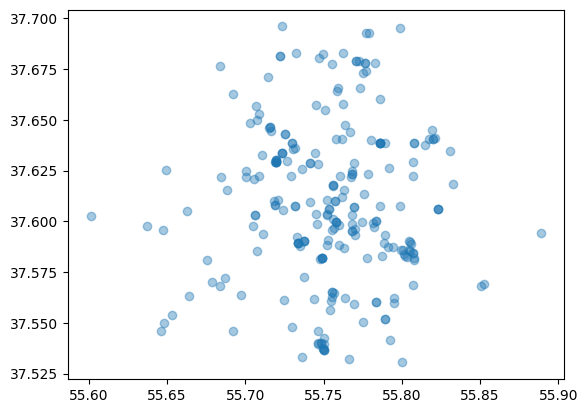

In [17]:
all_options = []
for job in jobs:
  all_options += mrr_options[job]
positions = [get_address(opt) for opt in all_options]
plt.scatter([pos[0] for pos in positions], [pos[1] for pos in positions], alpha=.4)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [18]:

df = pd.DataFrame([get_address(x) for x in all_options], columns=["lat", "lng"])
fig = px.scatter_mapbox(df, lat="lat", lon="lng", color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Выводы: мешать данные о пяти профессиях в один датасет - не лучшая идея. Отображение вакансий на карте даёт не слишком много информации, так как половина вакансий потеряна из-за того, что в них не указан адрес.

Понятно, что в центре Москвы вакансий на порядок больше, чем ближе ко МКАДу. За пределами третьего кольца их почти нет (хотя, как можно видеть, пара вакансий обнаружилась, значит фильтр по расстоянию от центра Москвы корректен)

Анализировать зарплаты сильно сложнее, так как hh.ru хранит их в своём формате

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [19]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 55.1MB/s]


Создадим DataFrame:

In [20]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [21]:
diamonds.iloc[:5]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [22]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [23]:
max_item = diamonds.loc[diamonds["total_sales_price"].idxmax()]
min_item = diamonds.loc[diamonds["total_sales_price"].idxmin()]
print(f"{max_item[0]} - {max_item['total_sales_price']}")
print(f"{min_item[0]} - {min_item['total_sales_price']}")

219703 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [24]:
print(sum(len(diamonds[diamonds[col] is None or diamonds[col] == 'unknown']) for col in diamonds.columns))

1746027


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [25]:
print('\n'.join(list(diamonds.loc[:, (diamonds is None or diamonds == 'unknown').any()].columns)))

color
cut_quality
eye_clean
culet_size
culet_condition
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [26]:
list(filter(lambda name: name.startswith(('fancy_color_', 'fluor_')), list(diamonds.columns)))

['fluor_color',
 'fluor_intensity',
 'fancy_color_dominant_color',
 'fancy_color_secondary_color',
 'fancy_color_overtone',
 'fancy_color_intensity']

In [27]:
not_informative_columns = list(diamonds.columns[pd.Series(diamonds.columns).str.startswith(('fancy_color_', 'fluor_'))])
print('\n'.join(not_informative_columns))

fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [28]:
sum(len(diamonds.loc[diamonds[col] is not None and diamonds[col] != 'unknown']) for col in not_informative_columns)

256727

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [29]:
diamonds = diamonds.drop(labels=not_informative_columns, axis=1)
diamonds.columns

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max',
       'total_sales_price'],
      dtype='object')

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [30]:
culet=diamonds.columns[pd.Series(diamonds.columns).str.startswith('culet')]
diamonds = diamonds.drop(labels=culet, axis=1)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [31]:
diamonds["total_sales_price"].sum(axis=0) / 10**3

1517721.991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [32]:
diamonds[diamonds["Unnamed: 0"] % 2 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219693,219694,Round,E,IF,12.52,Excellent,GIA,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219695,219696,Cushion Modified,unknown,VVS1,10.00,unknown,GIA,Very Good,Excellent,unknown,78.1,60.0,11.78,10.84,8.47,unknown,unknown,1124122
219697,219698,Oval,unknown,VS1,10.04,unknown,GIA,Excellent,Excellent,unknown,72.8,55.0,14.13,10.86,7.90,unknown,unknown,1161102
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500


(0.5 балла) А теперь с индексами, кратными 6:

In [33]:
diamonds[diamonds["Unnamed: 0"] % 6 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219677,219678,Round,G,VS1,10.14,Excellent,GIA,Excellent,Excellent,unknown,61.8,59.0,13.84,13.88,8.56,M,STK,851760
219683,219684,Pear,unknown,VS2,1.51,unknown,GIA,Very Good,Very Good,unknown,63.8,59.0,10.73,5.61,3.58,unknown,unknown,966401
219689,219690,Round,F,IF,10.66,Excellent,GIA,Excellent,Excellent,unknown,61.4,58.0,14.14,14.16,8.69,M,STK,1034844
219695,219696,Cushion Modified,unknown,VVS1,10.00,unknown,GIA,Very Good,Excellent,unknown,78.1,60.0,11.78,10.84,8.47,unknown,unknown,1124122


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [53]:
diamonds[diamonds.columns[diamonds.nunique() < 20]]

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [35]:
# This crashes the colab because of 200K x 200K multiplication
# costs = pd.DataFrame([diamonds["total_sales_price"]])
# So let's do this with first 100 items
costs = pd.DataFrame(diamonds["total_sales_price"].iloc[:100])
costs_t = costs
costs_t = costs_t.transpose()
costs @ costs_t

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,...,52400,52400,52400,52800,52800,52800,53200,53200,53200,53600
1,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,...,52400,52400,52400,52800,52800,52800,53200,53200,53200,53600
2,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,...,52400,52400,52400,52800,52800,52800,53200,53200,53200,53600
3,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,...,52400,52400,52400,52800,52800,52800,53200,53200,53200,53600
4,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,...,52400,52400,52400,52800,52800,52800,53200,53200,53200,53600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,52800,52800,52800,52800,52800,52800,52800,52800,52800,52800,...,69168,69168,69168,69696,69696,69696,70224,70224,70224,70752
96,53200,53200,53200,53200,53200,53200,53200,53200,53200,53200,...,69692,69692,69692,70224,70224,70224,70756,70756,70756,71288
97,53200,53200,53200,53200,53200,53200,53200,53200,53200,53200,...,69692,69692,69692,70224,70224,70224,70756,70756,70756,71288
98,53200,53200,53200,53200,53200,53200,53200,53200,53200,53200,...,69692,69692,69692,70224,70224,70224,70756,70756,70756,71288


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

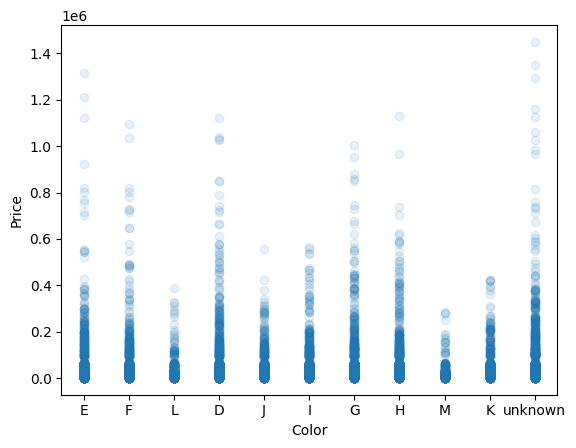

In [36]:
plt.scatter(diamonds["color"], diamonds["total_sales_price"], alpha=.1)
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

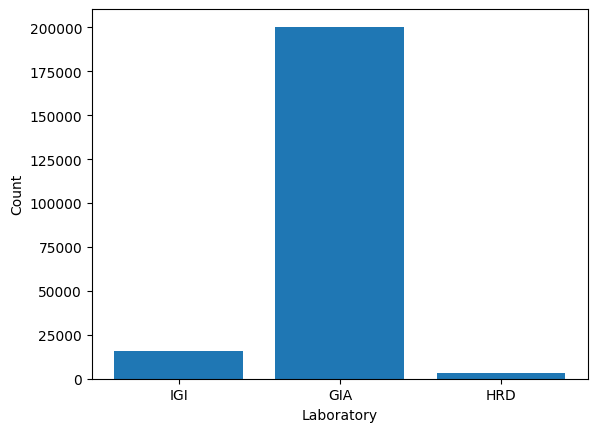

In [37]:
plt.bar(diamonds["lab"].unique(), [len(diamonds[diamonds["lab"] == lab]) for lab in diamonds["lab"].unique()])
plt.xlabel("Laboratory")
plt.ylabel("Count")
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

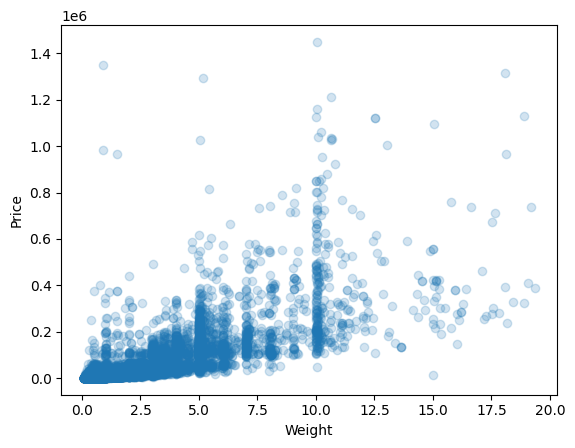

In [38]:
plt.scatter(diamonds["carat_weight"], diamonds["total_sales_price"], alpha=.2)
plt.xlabel("Weight")
plt.ylabel("Price")
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

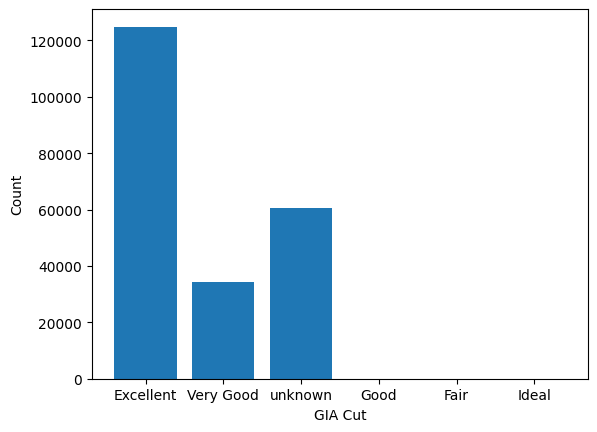

In [39]:
plt.bar(diamonds["cut_quality"].unique(), [len(diamonds[diamonds["cut_quality"] == qual]) for qual in diamonds["cut_quality"].unique()])
plt.xlabel("GIA Cut")
plt.ylabel("Count")
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Из графика weight-price можно увидеть, что оценщики часто округляют вес до целых карат (по выбросам в районе целых чисел)
Из графика GIA cut - count можно видеть, что, либо в датасете собраны только качественные камни, либо система оценивания инфлировала, и почти все камни получают высокие оценки.
Из графика Color-Price можно видеть, что влияние цвета на цену не видно (вероятно, отсутствует)

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [40]:
df = diamonds[diamonds.columns[pd.Series(diamonds.columns).str.startswith('meas')]]
df["price"] = diamonds["total_sales_price"]
df.iloc[:10]

<ipython-input-40-5104aac0f08f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,meas_length,meas_width,meas_depth,price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [41]:
df = df.sample(frac=1)
df

,meas_length,meas_width,meas_depth,price
52772,4.37,4.40,2.57,938
124410,4.62,5.57,3.31,2562
70165,4.31,4.33,2.69,1052
59668,4.33,4.35,2.61,980
66177,4.32,4.36,2.58,1036
...,...,...,...,...
83535,0.00,0.00,0.00,1210
190234,5.88,5.45,3.82,10504
164488,6.78,6.80,4.09,4888
99209,4.67,4.70,2.96,1636


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [42]:
df["dist"] = (df['meas_depth'] ** 3 + df['meas_length'] ** 3 + df['meas_width'] ** 3) ** (1/3)
df

,meas_length,meas_width,meas_depth,price,dist
52772,4.37,4.40,2.57,938,5.704296
124410,4.62,5.57,3.31,2562,6.751007
70165,4.31,4.33,2.69,1052,5.653639
59668,4.33,4.35,2.61,980,5.659518
66177,4.32,4.36,2.58,1036,5.653285
...,...,...,...,...,...
83535,0.00,0.00,0.00,1210,0.000000
190234,5.88,5.45,3.82,10504,7.494331
164488,6.78,6.80,4.09,4888,8.855791
99209,4.67,4.70,2.96,1636,6.141144


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [43]:
result_df = df[["dist", "price"]]
result_df

,dist,price
52772,5.704296,938
124410,6.751007,2562
70165,5.653639,1052
59668,5.659518,980
66177,5.653285,1036
...,...,...
83535,0.000000,1210
190234,7.494331,10504
164488,8.855791,4888
99209,6.141144,1636


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [104]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(result_df, test_size=0.2)
test

,dist,price
156709,8.434258,4223
58369,5.614079,984
122820,6.783746,2630
26913,5.593440,780
195440,10.364212,13053
...,...,...
68513,5.641964,1030
156850,7.495598,4238
125093,6.774332,2596
49458,6.684469,932


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

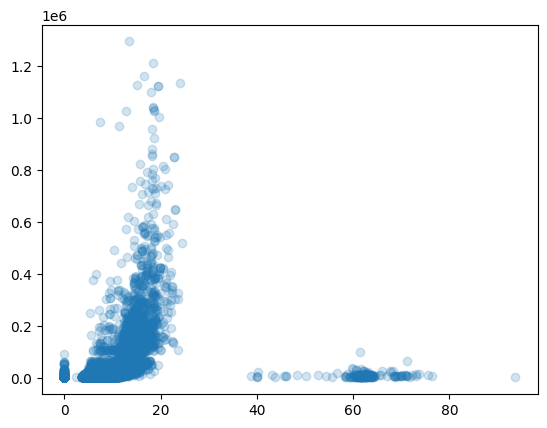

In [45]:
plt.scatter(train["dist"], train["price"], alpha=.2)
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

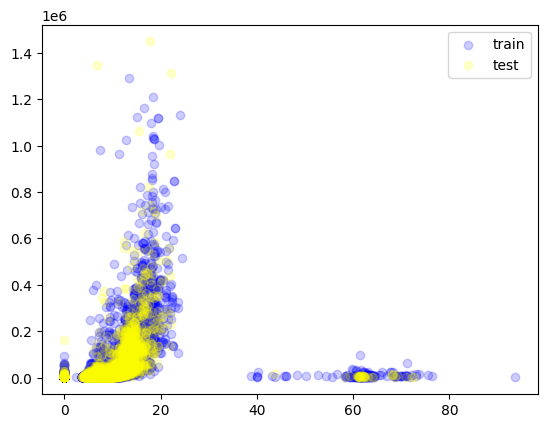

In [52]:
plt.scatter(train["dist"], train["price"], alpha=.2, color='blue', label='train')
plt.scatter(test["dist"], test["price"], alpha=.2, color='yellow', label='test')
plt.legend()
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [48]:
def f(item):
  res = item.tolist()
  d = train.iloc[(train['dist'] - item['dist']).abs().argsort()[:1]]
  res.append(d.index[0].astype(int))
  pr = d.iloc[0]
  res.append(abs(item["price"] - pr["price"]))


  return res
test1 = test.apply(f, axis=1, result_type='expand')
test1

,0,1,2,3
219558,22.034202,439430.0,219519.0,46153.0
45950,5.619071,900.0,48558.0,20.0
58042,5.596602,980.0,70154.0,72.0
30277,4.988046,790.0,55182.0,174.0
113635,6.248330,2168.0,89216.0,832.0
...,...,...,...,...
188461,8.628506,10607.0,170018.0,4693.0
155318,8.373294,3994.0,157481.0,419.0
209692,11.344260,29420.0,211857.0,399.0
30775,5.641964,794.0,49937.0,130.0


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [50]:
for i, item in test1.iloc[:10].iterrows():
  print(f"Difference is {round(item[3] / item[1] * 100)}%")

Difference is 11%
Difference is 2%
Difference is 7%
Difference is 22%
Difference is 38%
Difference is 41%
Difference is 2%
Difference is 36%
Difference is 90%
Difference is 70%


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [141]:
from sklearn.preprocessing import OneHotEncoder
def encode_feature(feature: str, data):

  data.drop(data[data[feature] is None or data[feature] == 'unknown'].index, axis=0)
  df = pd.get_dummies(data[feature], prefix=feature.upper())
  return pd.concat([data, df], axis=1).drop([feature], axis=1)

In [134]:
category_features = diamonds[diamonds.columns[diamonds.nunique() < 20]].columns.tolist()
category_features

['cut',
 'color',
 'clarity',
 'cut_quality',
 'lab',
 'symmetry',
 'polish',
 'eye_clean',
 'girdle_min',
 'girdle_max']

In [142]:
def prepare_dataset(i: int, j: int):
  data = encode_feature(category_features[i], diamonds)
  data = encode_feature(category_features[j], data)
  args1 = data.columns[pd.Series(data.columns).str.startswith(category_features[i].upper())]
  args2 = data.columns[pd.Series(data.columns).str.startswith(category_features[j].upper())]
  args = pd.concat([data[args1], data[args2]], axis=1)
  price = data["total_sales_price"]
  return pd.concat([args, price], axis=1)

In [143]:
prepare_dataset(0, 1)

,CUT_Asscher,CUT_Cushion,CUT_Cushion Modified,CUT_Emerald,CUT_Heart,CUT_Marquise,CUT_Oval,CUT_Pear,CUT_Princess,CUT_Radiant,...,COLOR_F,COLOR_G,COLOR_H,COLOR_I,COLOR_J,COLOR_K,COLOR_L,COLOR_M,COLOR_unknown,total_sales_price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1210692
219699,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1292500
219700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1315496
219701,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1350000


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [144]:
from sklearn.model_selection import train_test_split

def split_dataset(dataset):
  return train_test_split(dataset, test_size=0.2)


split_dataset(prepare_dataset(0,1))[0]

,CUT_Asscher,CUT_Cushion,CUT_Cushion Modified,CUT_Emerald,CUT_Heart,CUT_Marquise,CUT_Oval,CUT_Pear,CUT_Princess,CUT_Radiant,...,COLOR_F,COLOR_G,COLOR_H,COLOR_I,COLOR_J,COLOR_K,COLOR_L,COLOR_M,COLOR_unknown,total_sales_price
150996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3832
19504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,720
188405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,10582
137125,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,3215
125285,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112617,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2000
93097,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1485
215428,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,45900
110278,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1988


(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

def train_model(i, j):
  train, test = split_dataset(prepare_dataset(i, j))
  X = train.drop(["total_sales_price"], axis=1).to_numpy()
  y = train["total_sales_price"].to_numpy()
  regressor = DecisionTreeRegressor(random_state=0)
  regressor.fit(X, y)
  return regressor

train_model(0,1)

DecisionTreeRegressor(random_state=0)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [146]:
from sklearn.metrics import mean_squared_error

def get_error(i, j):
  regressor = train_model(i, j)
  train, test = split_dataset(prepare_dataset(i, j))
  X = train.drop(["total_sales_price"], axis=1).to_numpy()
  y = train["total_sales_price"].to_numpy()
  y_pred = regressor.apply(X)
  return mean_squared_error(y, y_pred)

get_error(0,1)

701977591.1901264

In [147]:
min_error = 1e18
for i in tqdm(range(len(category_features))):
  for j in range(i + 1, len(category_features)):
    min_error = min(min_error, get_error(i, j))
print()
print(min_error**0.5)

100%|██████████| 10/10 [00:36<00:00,  3.66s/it]


26016.482864445585


In [148]:
diamonds["total_sales_price"].mean()

6908.062206706326

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Стоит с подозрением относиться к решающему дереву. Pandas и sklearn имеют некоторую дублирующую логику и иногда не очень хорошо дружат друг с другом.

Видимо, по двум признакам хорошо понять стоимость не получается, то есть зависимость либо слабая, либо от большего числа параметров, так что нельзя оставлять только два из них. 

В pandas иногда оказывается нетривиально сделать самые простые вещи, а иногда оказывается тривиально сделать сложную логику. В sklearn огромное количество аргументов, в которых сложно разобраться, то можно их просто не использовать, пока "так работает". Короче, разбираться придется еще много и долго, чтобы это освоить.

Впрочем, и с pandas и с sklearn я сталкиваюсь уже далеко не впервые, и каждый раз заново изучаю весь функционал, потому что проще загуглить заново, чем запомнить.